# Notebook 5: Entscheidungsbäume

In diesem Notebook wollen wir Entscheidungsbäume als neues ML-Modell betrachten und ein Modell auf den Iris-Daten trainieren.

Hinweis: Dieses Notebook folgt im großen Teilen dieser [Quelle](https://towardsdatascience.com/visualizing-decision-trees-in-jupyter-notebook-with-python-and-graphviz-78703230a7b1).

### Iris Daten laden

In [1]:
from sklearn import datasets

X,y =  datasets.load_iris(return_X_y=True, as_frame=True) # Daten können direkt mit sklearn geladen werden

Beim "Iris Flower Dataset" geht es darum drei unterschiedliche Arten von Schwertlilien anhand von vier Features zu unterscheiden. Weitere Informationen zu diesem bekannten Datensatz finden sich auf [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set).

In [2]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [4]:
X.shape

(150, 4)

Anhand der Features in X wollen wir die Art Blume vorhersagen.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Wir trainieren nun einen einfachen Entscheidungsbaum mit der Entropie als Splitting-Kriterium.

In [6]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Mit dem gelernten Baum machen wir wie gewohnt Vorhersagen auf den Testdaten.

In [7]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

1.0

Wie wir sehen, schafft es der Baum die Daten perfekt zu klassifizieren. Das liegt aber daran, dass der Datensatz wirklich einfach ist.

Den gelernten Baum können wir nun einfach visualisieren und die gelernten Entscheidungsregeln mit anzeigen.

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(model, 'tree.dot', feature_names=X.columns)

In [9]:
! dot -Tpng tree.dot -o tree.png
! pip install opencv-python

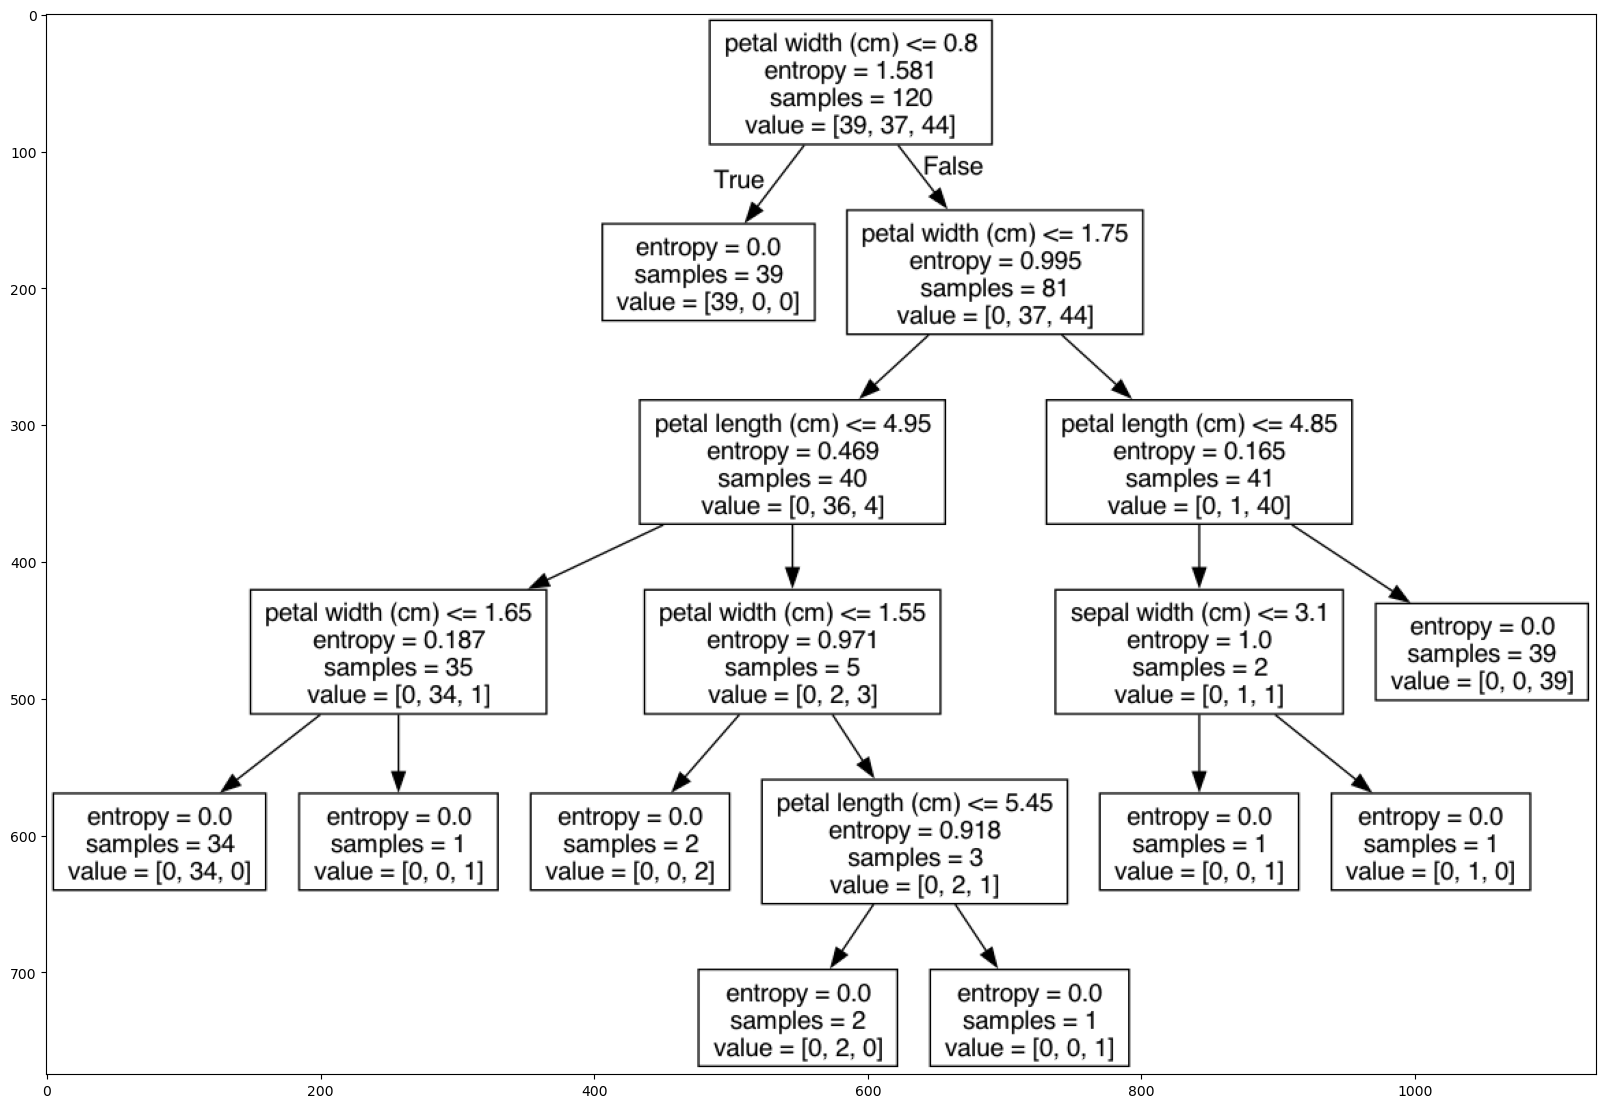

In [10]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

Wir sehen, dass alle Blätter dieses Baums "pure" sind, d.h. sie enthalten nur noch Datenpunkte einer Klasse. Trainieren wir den Baum mit einer maximalen Tiefe, ist dies nicht mehr der Fall:

In [11]:
model_2 = DecisionTreeClassifier(criterion="entropy", max_depth=2)
model_2.fit(X,y)
export_graphviz(model_2, 'tree2.dot', feature_names=X.columns)

In [12]:
! dot -Tpng tree2.dot -o tree2.png

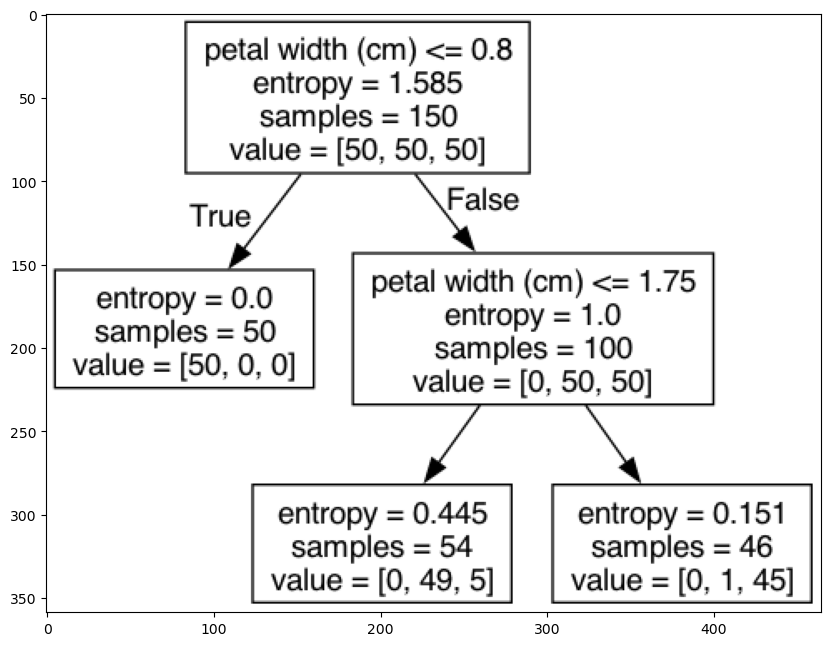

In [13]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree2.png')
plt.figure(figsize = (10, 10))
plt.imshow(img)

In diesem Fall ist auch die Accuracy nicht mehr bei 100%.

In [14]:
from sklearn.metrics import accuracy_score
predictions = model_2.predict(X_test)
accuracy_score(y_test, predictions)

0.9666666666666667